In [ ]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
ls

'2101202076-Dinda Wahyu Anggraeni.ipynb'   scenes_nn_4_layers.ipynb
 3scene/                                   Simple_ANN_in_Python.ipynb
 Cancer_Clustering.ipynb                   SLO-main.zip
 classify_iris_ANN.ipynb                   Untitled0.ipynb
 data_cancer.csv                           Untitled1.ipynb
 Iris_Clustering.ipynb                     Untitled2.ipynb
 README.md                                 Untitled3.ipynb


In [ ]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [ ]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("3scene")
data = []
labels = []

[INFO] loading images...


In [ ]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
 #bisa pasang preprocessing disini jika mau, seperti filterring, dll
	image = np.array(image.resize((64, 64))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [ ]:
print(labels)

['coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 

In [ ]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [ ]:
print(labels)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [0 0 1]
 [0 0 1]
 [0 0 1]]


In [ ]:
print(np.array(data).shape)

(948, 64, 64, 3)


In [ ]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)

(711, 64, 64, 3)
(237, 64, 64, 3)


In [ ]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense, Dropout

model = Sequential(
    [
        Flatten(input_shape=(64*64*3,)),
        Dense(256, activation="relu"),
        Dense(128, activation="relu"),
        Dropout(0.2),
        Dense(128, activation="relu"),
        Dense(64, activation="relu"),
        Dropout(0.2),
        Dense(64, activation="relu"),
        Dense(32, activation="relu"),
        Dropout(0.2),
        Dense(32, activation="relu"),
        Dense(16, activation="relu"),
        Dense(3, activation = "softmax"),
    ]
)

In [ ]:
model.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_37 (Flatten)         (None, 12288)             0         
_________________________________________________________________
dense_295 (Dense)            (None, 256)               3145984   
_________________________________________________________________
dense_296 (Dense)            (None, 128)               32896     
_________________________________________________________________
dropout_100 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_297 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_298 (Dense)            (None, 64)                8256      
_________________________________________________________________
dropout_101 (Dropout)        (None, 64)              

In [ ]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50, batch_size=32)

[INFO] training network...
Epoch 1/50
23/23 [==============================] - 2s 36ms/step - loss: 1.1831 - accuracy: 0.3000 - val_loss: 1.0747 - val_accuracy: 0.3924
Epoch 2/50
23/23 [==============================] - 1s 26ms/step - loss: 1.0956 - accuracy: 0.3586 - val_loss: 1.0751 - val_accuracy: 0.3966
Epoch 3/50
23/23 [==============================] - 1s 26ms/step - loss: 1.0849 - accuracy: 0.3982 - val_loss: 1.0849 - val_accuracy: 0.2743
Epoch 4/50
23/23 [==============================] - 1s 26ms/step - loss: 1.0748 - accuracy: 0.3709 - val_loss: 1.0602 - val_accuracy: 0.4008
Epoch 5/50
23/23 [==============================] - 1s 26ms/step - loss: 1.0758 - accuracy: 0.3922 - val_loss: 1.0155 - val_accuracy: 0.4557
Epoch 6/50
23/23 [==============================] - 1s 26ms/step - loss: 1.0343 - accuracy: 0.4469 - val_loss: 0.9044 - val_accuracy: 0.5612
Epoch 7/50
23/23 [==============================] - 1s 27ms/step - loss: 0.9560 - accuracy: 0.5124 - val_loss: 0.8657 - val_acc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


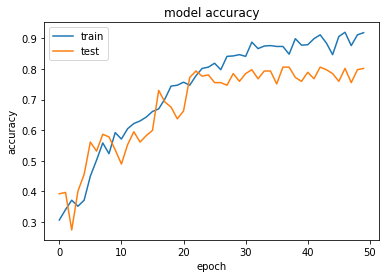

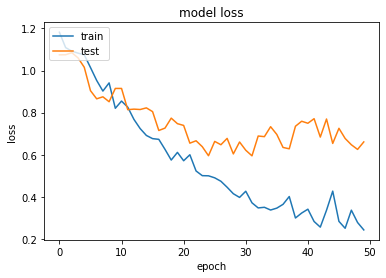

In [ ]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

       coast       0.75      0.86      0.80        95
      forest       0.89      0.74      0.81        78
     highway       0.81      0.78      0.79        64

    accuracy                           0.80       237
   macro avg       0.81      0.80      0.80       237
weighted avg       0.81      0.80      0.80       237

